In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import scipy.optimize as opt
import statsmodels.api as sm

In [2]:
path= "./Result/Daily_weather_and_collision_2016.csv"
df = pd.read_csv(path)
df.head()

,Date,Temp High,Temp Low,Rain level (inches),Collision Count
0,1/1/2016,64.34,46.96,0.000,137
1,1/2/2016,64.67,46.02,0.000,97
2,1/3/2016,61.68,54.76,0.000,101
3,1/4/2016,67.59,55.12,0.001,122
4,1/5/2016,56.98,47.89,1.173,128


In [3]:
df.corr()

,Temp High,Temp Low,Rain level (inches),Collision Count
Temp High,1.000000,0.854394,-0.226162,0.259874
Temp Low,0.854394,1.000000,-0.209684,0.196831
Rain level (inches),-0.226162,-0.209684,1.000000,0.014150
Collision Count,0.259874,0.196831,0.014150,1.000000


In [4]:
x = df.iloc[:,1]
y = df.iloc[:,4]

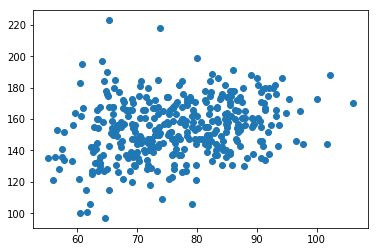

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
#cut bins to seperate into several groups
bins=[0,65,70,75,80,85,90,200]
group_names = ["<65","[65,70)","[70,75)","[75,80)","[80,85)","[85,90)",">=90"]
df["Temp Group"]=pd.cut(df["Temp High"],bins,labels=group_names)
df.head()

,Date,Temp High,Temp Low,Rain level (inches),Collision Count,Temp Group
0,1/1/2016,64.34,46.96,0.000,137,<65
1,1/2/2016,64.67,46.02,0.000,97,<65
2,1/3/2016,61.68,54.76,0.000,101,<65
3,1/4/2016,67.59,55.12,0.001,122,"[65,70)"
4,1/5/2016,56.98,47.89,1.173,128,<65


In [7]:
collision_less65=df[df["Temp Group"]=="<65"]
collision_65to70=df[df["Temp Group"]=="[65,70)"]
collision_70to75=df[df["Temp Group"]=="[70,75)"]
collision_75to80=df[df["Temp Group"]=="[75,80)"]
collision_80to85=df[df["Temp Group"]=="[80,85)"]
collision_85to90=df[df["Temp Group"]=="[85,90)"]
collision_more90=df[df["Temp Group"]==">=90"]

In [8]:
collision_mean = pd.DataFrame(df.groupby("Temp Group")["Collision Count"].mean()).reset_index()
collision_mean

,Temp Group,Collision Count
0,<65,142.916667
1,"[65,70)",154.750000
2,"[70,75)",152.500000
3,"[75,80)",153.196970
4,"[80,85)",157.017857
5,"[85,90)",160.363636
6,>=90,162.894737


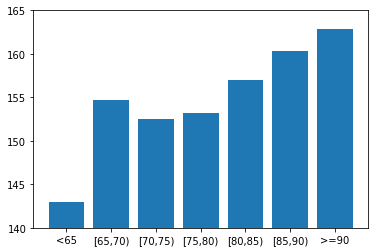

In [9]:
plt.bar(collision_mean["Temp Group"],collision_mean["Collision Count"])
plt.ylim(140,165)
plt.show()

In [16]:
temp_list=[collision_less65["Collision Count"],collision_65to70["Collision Count"],collision_70to75["Collision Count"]\
           ,collision_75to80["Collision Count"],collision_80to85["Collision Count"],collision_85to90["Collision Count"]\
           ,collision_more90["Collision Count"]]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1a435e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1a43a780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1a42cdd8>,
 'medians': [<matplotlib.lines.Line2D at 0x1c1a43afd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c1a443438>,
 'means': []}

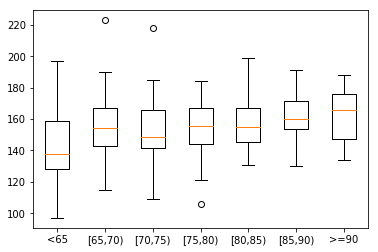

In [17]:
plt.boxplot(temp_list,labels=collision_mean["Temp Group"])

In [18]:
population_list = df["Collision Count"]
sample1=collision_less65["Collision Count"]

In [19]:
stats.ttest_1samp(sample1,population_list.mean())

Ttest_1sampResult(statistic=-3.4313795074356666, pvalue=0.0012614248935393297)

In [20]:
sample2=collision_more90["Collision Count"]
stats.ttest_1samp(sample2,population_list.mean())

Ttest_1sampResult(statistic=3.3740305714198704, pvalue=0.001749731266063906)